## Model Selection and Evaluation

Our notebook explores three regression models:
- **Linear Regression**: A simple linear model that assumes a linear relationship between input features and the target variable.
- **Decision Tree Regression**: A tree-based model that splits the data into decision nodes, making it more flexible but prone to overfitting.
- **Random Forest Regression**: An ensemble model combining multiple decision trees to improve accuracy and reduce overfitting.

## Best Fit Model: Random Forest Regression

After evaluating the models, we selected **Random Forest Regression** as the best fit because:
- It provides better generalization compared to Decision Trees, reducing the risk of overfitting.
- It is more robust than Linear Regression, especially for non-linear relationships in the data.
- It performs well on datasets with complex patterns by averaging multiple decision trees, making predictions moreaccurate.

We confirmed that Random Forest was the best fit by comparing metrics such as, R² score, Mean Squared Error, etc. across all models, where Random Forest consistently outperformed the others.

## Overfitting

Overfitting happens when a model becomes too good at memorizing the training data instead of learning the general patterns. Imagine studying for a test by only memorizing specific questions, if the test changes slightly, you might struggle because you didn’t really understand the subject.<br>
We can spot overfitting by checking how well the model performs on new, unseen data. If it does really well on the training data but poorly on new data, it’s a sign that it has memorized rather than learned.<br>
For example, Decision Trees can overfit if they grow too deep, making too many specific decisions. To prevent this, we can limit their depth or change their settings to make them more general and flexible.

## Hyperparameter Adjusting

Hyperparameters are adjustable settings that influence a model's performance. We fine-tune them to improve accuracy and avoid overfitting. <br>
For example:
- **Decision Tree Depth**: Limiting the depth prevents excessive splits and overfitting.
- **Number of Trees in Random Forest**: Increasing trees improves generalization but can increase cost in time and computation.

## Performance Measurement: F1 Score

Explained at the bottom cell after measurement of the F1 score.


In [7]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




# This cell is our initial cell used for importing all the libraries used. Also we import our dataset and we make some initial assesments of the dataset using head,info, and describe.


# Load the dataset (ensure the file 'F1DriversDataset.csv' is in your working directory)
df = pd.read_csv('F1DriversDataset.csv')

# Create an HTML representation of the head of the DataFrame wrapped in a scrollable div
html_head = df.head().to_html()
scrollable_head = f'<div style="overflow-x: auto; white-space: nowrap;">{html_head}</div>'

# Display the head in a nicer format
display(HTML("<h3>Head of the dataset:</h3>"))
display(HTML(scrollable_head))

# Display concise summary of the dataset (including data types and non-null counts)
print("\nDataset Info:")
print(df.info())

# Display descriptive statistics for numerical columns
print("\nStatistical Description:")
print(df.describe())

# In this cell we check the data for each column. In regards to data cleaning we did not do anything in particular as dataset had already been cleaned.

# Calculate the percentage of valid (non-null) data for each column
valid_percentages = (df.notnull().sum() / len(df)) * 100

# Display the percentages for each column
print("Percentage of valid data in each column:")
print(valid_percentages)

# Identify columns with less than 50% valid data
columns_below_threshold = valid_percentages[valid_percentages < 50].index.tolist()

if columns_below_threshold:
    print("\nThe following columns have less than 50% valid data:")
    print(columns_below_threshold)
else:
    print("\nAll columns have at least 50% valid data.")


,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,Points,Active,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,6.0,False,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,False,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              868 non-null    object 
 1   Nationality         868 non-null    object 
 2   Seasons             868 non-null    object 
 3   Championships       868 non-null    float64
 4   Race_Entries        868 non-null    float64
 5   Race_Starts         868 non-null    float64
 6   Pole_Positions      868 non-null    float64
 7   Race_Wins           868 non-null    float64
 8   Podiums             868 non-null    float64
 9   Fastest_Laps        868 non-null    float64
 10  Points              868 non-null    float64
 11  Active              868 non-null    bool   
 12  Championship Years  34 non-null     object 
 13  Decade              868 non-null    int64  
 14  Pole_Rate           868 non-null    float64
 15  Start_Rate          868 non-null    float6

Linear Regression Model for Champions in season 2018:
  Coefficient (slope): 8.723210668284384
  Intercept: 0.0
  Coefficient of Determination (R^2): -0.2866481948540405
  Predicted Points for Race_Starts = 164 : [1430.6065496]


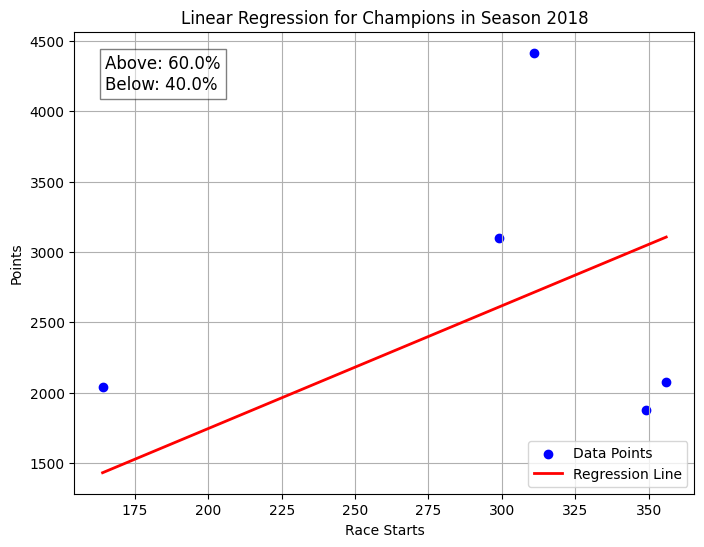

Linear Regression Model for Non-Champions in season 2018:
  Coefficient (slope): 4.524259728880907
  Intercept: 0.0
  Coefficient of Determination (R^2): 0.5509773221734703
  Predicted Points for Race_Starts = 164 : [741.97859554]


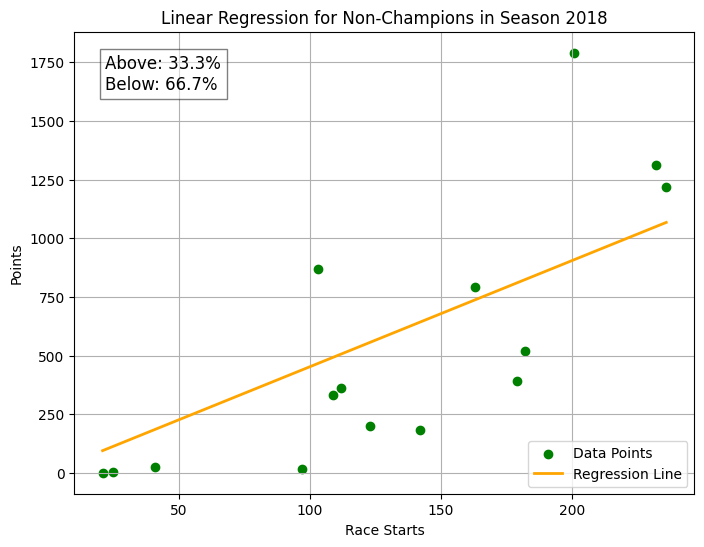

In [2]:
#In this cell we create out linear regression function which creates our linear regression model and test our prediction against.
def perform_linear_regression(isChampion, Race_Starts, season):

    # Filter the dataset based on champion status.
    if isChampion:
        subset = df[df['Champion'] == True]
    else:
        subset = df[df['Champion'] == False]
    
    # Further filter to include only drivers whose 'Seasons' string contains the given season.
    subset = subset[subset['Seasons'].str.contains(season)]
    
    # Extract independent variable (X) and dependent variable (y).
    X = subset[['Race_Starts']].values
    y = subset['Points'].values
    
    # Initialize and fit the Linear Regression model with intercept fixed to 0.
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    
    # Calculate the coefficient of determination (R^2).
    r2 = model.score(X, y)
    
    # Prepare the input for prediction.
    if isinstance(Race_Starts, (int, float)):
        X_new = np.array([[Race_Starts]])
    elif isinstance(Race_Starts, list) or isinstance(Race_Starts, np.ndarray):
        X_new = np.array([[x] for x in Race_Starts])
    else:
        raise ValueError("Race_Starts must be a number or a list/array of numbers.")
    
    # Predict Points for the provided Race_Starts value(s).
    predicted_points = model.predict(X_new)
    
    # Print model details.
    group = "Champions" if isChampion else "Non-Champions"
    print(f"Linear Regression Model for {group} in season {season}:")
    print("  Coefficient (slope):", model.coef_[0])
    print("  Intercept:", model.intercept_)
    print("  Coefficient of Determination (R^2):", r2)
    print("  Predicted Points for Race_Starts =", Race_Starts, ":", predicted_points)
    
    # Compute predictions for the subset data to calculate percentages.
    predicted_subset = model.predict(X)
    count_above = np.sum(y > predicted_subset)
    count_below = np.sum(y < predicted_subset)
    total = len(y)
    perc_above = (count_above / total) * 100 if total > 0 else 0
    perc_below = (count_below / total) * 100 if total > 0 else 0
    
    # Create a range of Race_Starts values for a smooth regression line.
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = model.predict(X_range)
    
    # Plot the regression graph.
    plt.figure(figsize=(8, 6))
    if isChampion:
        plt.scatter(X, y, color='blue', label='Data Points')
        line_color = 'red'
    else:
        plt.scatter(X, y, color='green', label='Data Points')
        line_color = 'orange'
    
    plt.plot(X_range, y_range, color=line_color, linewidth=2, label='Regression Line')
    plt.xlabel("Race Starts")
    plt.ylabel("Points")
    plt.title(f"Linear Regression for {group} in Season {season}")
    plt.legend()
    plt.grid(True)
    plt.text(0.05, 0.95, f"Above: {perc_above:.1f}%\nBelow: {perc_below:.1f}%",
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.5))
    plt.show()
    
    return model, predicted_points

# Predict points and plot for champions 
model_champion, pred_champion = perform_linear_regression(isChampion=True, Race_Starts=164, season="2018")

# Predict points and plot for non-champions
model_non_champion, pred_non_champion = perform_linear_regression(isChampion=False, Race_Starts=164, season="2018")


Decision Tree Regression Model for Champions in season 2018:
  Coefficient of Determination (R^2): 1.0
  Predicted Points for Race_Starts = 164 : [2036.5]


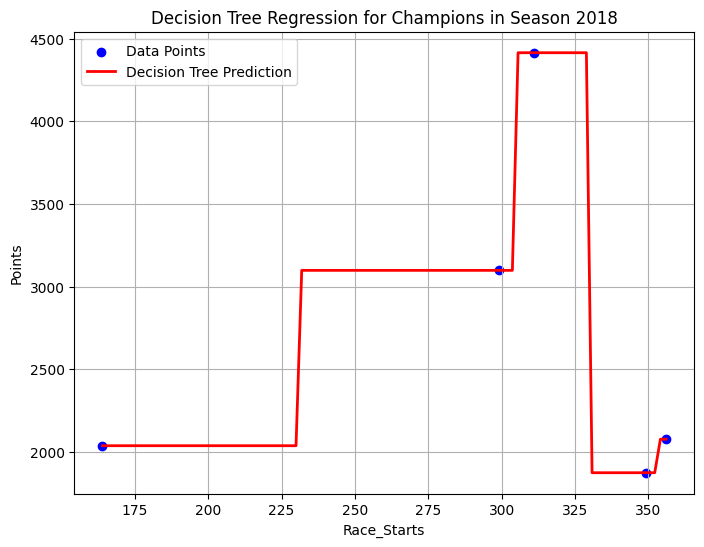

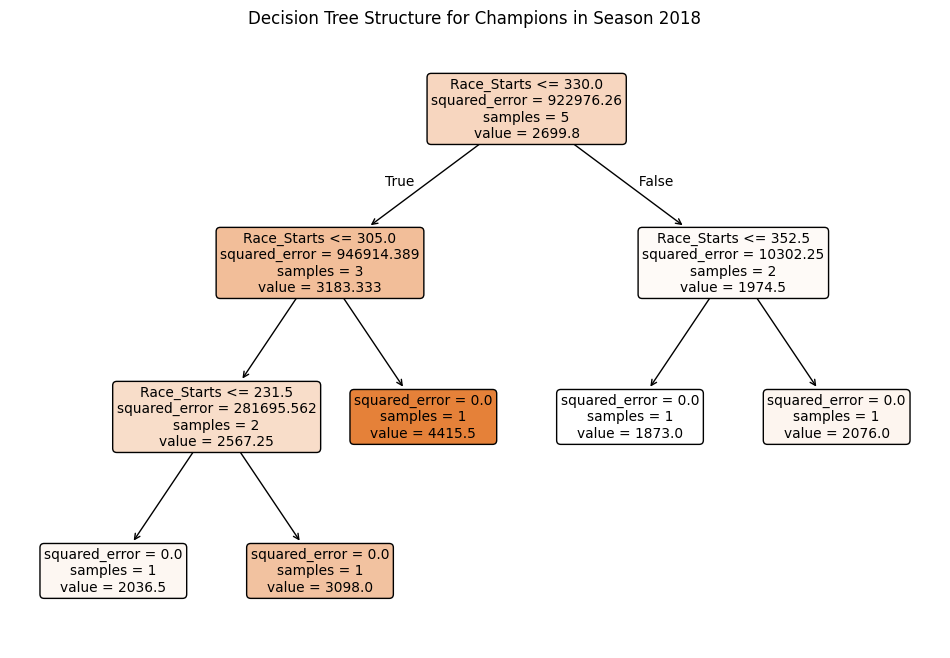

Decision Tree Regression Model for Non-Champions in season 2018:
  Coefficient of Determination (R^2): 1.0
  Predicted Points for Race_Starts = 164 : [794.5]


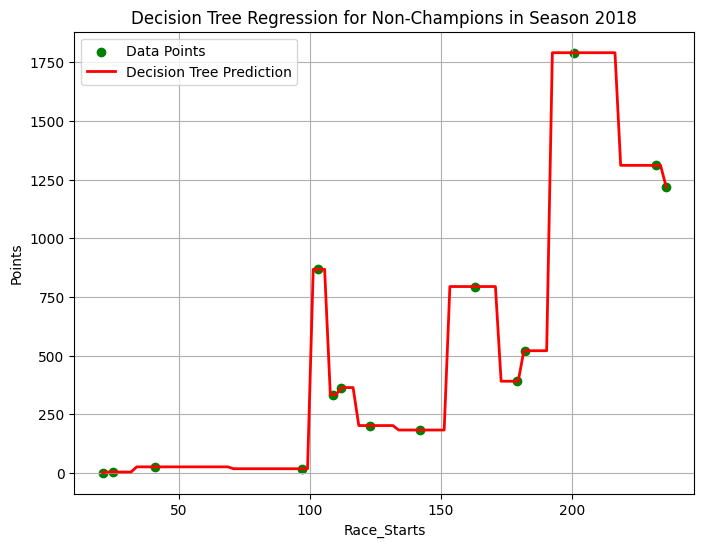

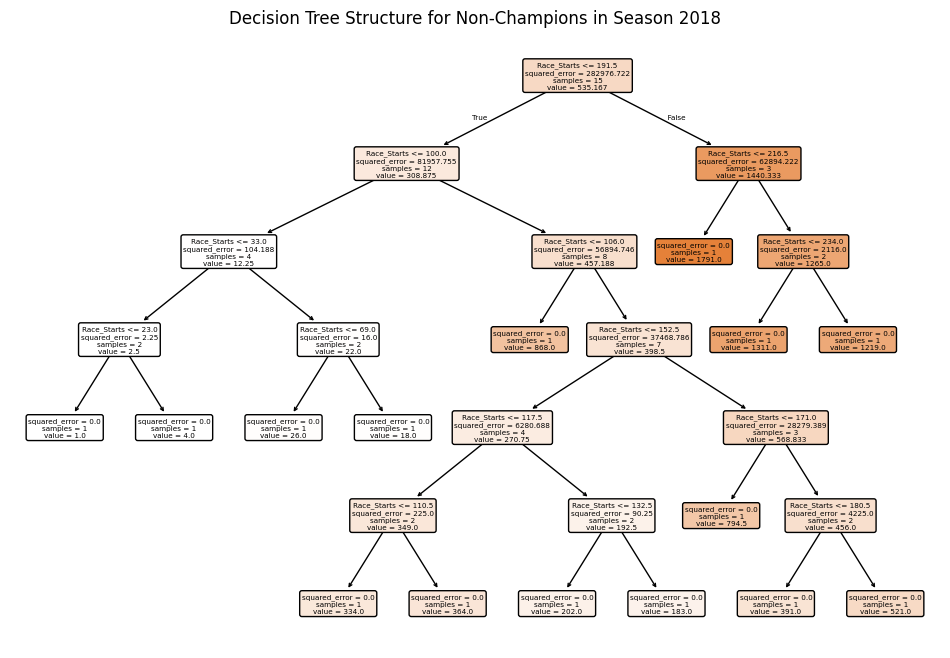

In [3]:
#In this cell we create our decision tree function which creates our decision tree model and test our prediction against.

def perform_decision_tree_regression(isChampion, Race_Starts, season, max_depth=None):
   
    # Filter the dataset based on champion status.
    if isChampion:
        subset = df[df['Champion'] == True]
    else:
        subset = df[df['Champion'] == False]
    
    # Further filter to include only drivers whose 'Seasons' string contains the given season.
    subset = subset[subset['Seasons'].str.contains(season)]
    
    # Extract independent variable (X) and dependent variable (y).
    X = subset[['Race_Starts']].values
    y = subset['Points'].values
    
    # Initialize and fit the Decision Tree Regressor.
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X, y)
    
    # Calculate the coefficient of determination (R^2).
    r2 = model.score(X, y)
    
    # Prepare the input for prediction.
    if isinstance(Race_Starts, (int, float)):
        X_new = np.array([[Race_Starts]])
    elif isinstance(Race_Starts, list) or isinstance(Race_Starts, np.ndarray):
        X_new = np.array([[x] for x in Race_Starts])
    else:
        raise ValueError("Race_Starts must be a number or a list/array of numbers.")
    
    # Predict Points for the provided Race_Starts value(s).
    predicted_points = model.predict(X_new)
    
    # Print out the model details.
    group = "Champions" if isChampion else "Non-Champions"
    print(f"Decision Tree Regression Model for {group} in season {season}:")
    print("  Coefficient of Determination (R^2):", r2)
    print("  Predicted Points for Race_Starts =", Race_Starts, ":", predicted_points)
    
    # Plot the regression results (piecewise constant predictions) along with the data points.
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue' if isChampion else 'green', label='Data Points')
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = model.predict(X_range)
    plt.plot(X_range, y_range, color='red', linewidth=2, label='Decision Tree Prediction')
    plt.xlabel("Race_Starts")
    plt.ylabel("Points")
    plt.title(f"Decision Tree Regression for {group} in Season {season}")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot the decision tree structure.
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=["Race_Starts"], rounded=True)
    plt.title(f"Decision Tree Structure for {group} in Season {season}")
    plt.show()
    
    return model, predicted_points

# Example calls:
# Predict points and plot for champions in season "1960" given 164 race starts.
model_champion_dt, pred_champion_dt = perform_decision_tree_regression(isChampion=True, Race_Starts=164, season="2018")

# Predict points and plot for non-champions in season "1960" given 164 race starts.
model_non_champion_dt, pred_non_champion_dt = perform_decision_tree_regression(isChampion=False, Race_Starts=164, season="2018")


Random Forest Regression Model for Champions in Season 2018:
  Coefficient of Determination (R^2): 0.8739975859996658
  Predicted Points for Race_Starts = 164 : [2460.94]


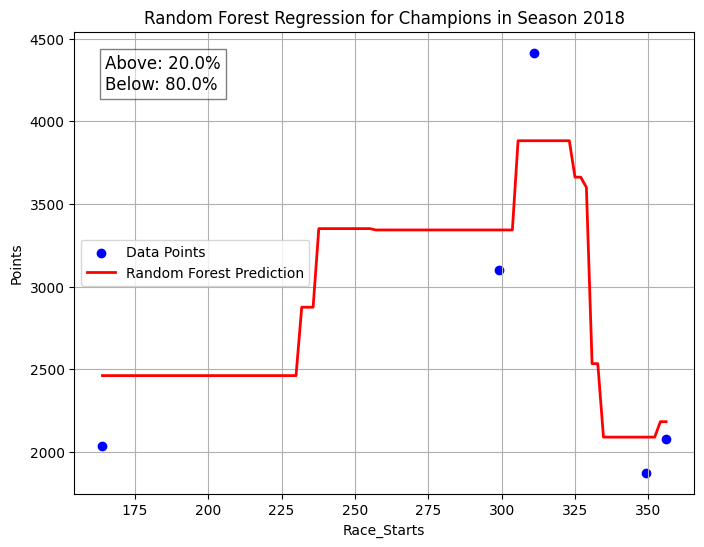

Random Forest Regression Model for Non-Champions in Season 2018:
  Coefficient of Determination (R^2): 0.8843150350215301
  Predicted Points for Race_Starts = 164 : [689.06]


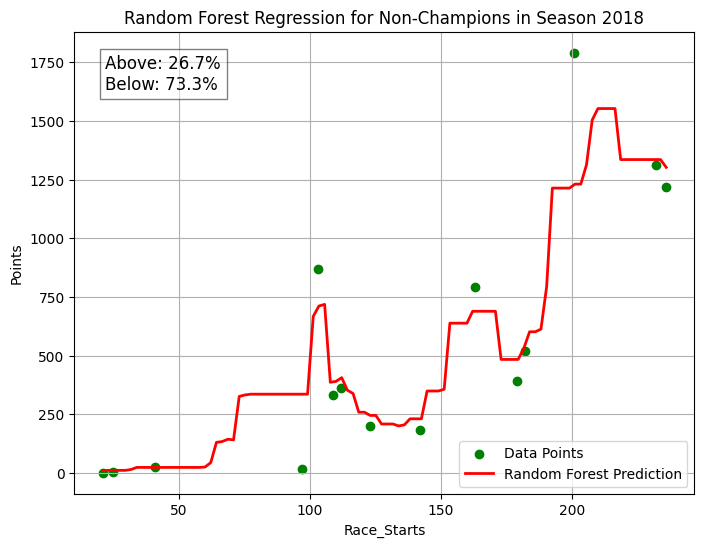

In [4]:
#In this cell we create our random forest function which creates our random forest model and test our prediction against.


def perform_random_forest_regression(isChampion, Race_Starts, season, n_estimators=100, max_depth=None):
    
    # Filter the dataset based on champion status.
    if isChampion:
        subset = df[df['Champion'] == True]
    else:
        subset = df[df['Champion'] == False]
    
    # Further filter to include only drivers whose 'Seasons' string contains the given season.
    subset = subset[subset['Seasons'].str.contains(season)]
    
    # Extract independent variable (X) and dependent variable (y).
    X = subset[['Race_Starts']].values
    y = subset['Points'].values
    
    # Initialize and fit the Random Forest Regressor.
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X, y)
    
    # Calculate the coefficient of determination (R^2).
    r2 = model.score(X, y)
    
    # Prepare the input for prediction.
    if isinstance(Race_Starts, (int, float)):
        X_new = np.array([[Race_Starts]])
    elif isinstance(Race_Starts, list) or isinstance(Race_Starts, np.ndarray):
        X_new = np.array([[x] for x in Race_Starts])
    else:
        raise ValueError("Race_Starts must be a number or a list/array of numbers.")
    
    # Predict Points for the provided Race_Starts value(s).
    predicted_points = model.predict(X_new)
    
    # Print model details.
    group = "Champions" if isChampion else "Non-Champions"
    print(f"Random Forest Regression Model for {group} in Season {season}:")
    print("  Coefficient of Determination (R^2):", r2)
    print("  Predicted Points for Race_Starts =", Race_Starts, ":", predicted_points)
    
    # Compute predictions for the subset data to calculate percentages.
    predicted_subset = model.predict(X)
    count_above = np.sum(y > predicted_subset)
    count_below = np.sum(y < predicted_subset)
    total = len(y)
    perc_above = (count_above / total) * 100 if total > 0 else 0
    perc_below = (count_below / total) * 100 if total > 0 else 0
    
    # Create a range of Race_Starts values for a smooth regression line.
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_range = model.predict(X_range)
    
    # Plot the regression graph.
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue' if isChampion else 'green', label='Data Points')
    plt.plot(X_range, y_range, color='red', linewidth=2, label='Random Forest Prediction')
    plt.xlabel("Race_Starts")
    plt.ylabel("Points")
    plt.title(f"Random Forest Regression for {group} in Season {season}")
    plt.legend()
    plt.grid(True)
    plt.text(0.05, 0.95, f"Above: {perc_above:.1f}%\nBelow: {perc_below:.1f}%",
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.5))
    plt.show()
    
    # Plot feature importances (since we can't easily visualize the ensemble tree structure).
    #plt.figure(figsize=(6, 4))
    #plt.bar(["Race_Starts"], model.feature_importances_, color='purple')
    #plt.title(f"Feature Importances for {group} in Season {season}")
   # plt.ylabel("Importance")
    #plt.ylim(0, 1)
    #plt.show()
    
    return model, predicted_points

# Example calls:
# Predict points and plot for champions in season "1960" given 164 race starts.
model_champion_rf, pred_champion_rf = perform_random_forest_regression(isChampion=True, Race_Starts=164, season="2018")

# Predict points and plot for non-champions in season "1960" given 164 race starts.
model_non_champion_rf, pred_non_champion_rf = perform_random_forest_regression(isChampion=False, Race_Starts=164, season="2018")


## This is an extra function primarily to easily check a drivers performance against our machine learning models to see how well they did and how accurate out predictions were.
def compare_driver_predictions():
       # Get user inputs.
    driver_name = input("Enter driver name: ")
    season = input("Enter season: ")
    
    # Filter the dataset for the given driver and season.
    driver_data = df[(df['Driver'] == driver_name) & (df['Seasons'].str.contains(season))]
    if driver_data.empty:
        print(f"No data found for {driver_name} in season {season}")
        return
    else:
        # If there are multiple entries, take the first one.
        race_starts_val = driver_data.iloc[0]['Race_Starts']
        champion_flag = driver_data.iloc[0]['Champion']
        actual_points = driver_data.iloc[0]['Points']
        
        print(f"\nDriver: {driver_name}")
        print(f"Season: {season}")
        print(f"Race Starts: {race_starts_val}")
        print(f"Champion: {champion_flag}")
        print(f"Actual Points: {actual_points}")
        
        # Use the subset of data based on champion flag and season for model fitting.
        subset = df[(df['Champion'] == champion_flag) & (df['Seasons'].str.contains(season))]
        X = subset[['Race_Starts']].values
        y = subset['Points'].values
        
        # ----- Linear Regression -----
        from sklearn.linear_model import LinearRegression
        lin_model = LinearRegression(fit_intercept=False)
        lin_model.fit(X, y)
        pred_lin = lin_model.predict(np.array([[race_starts_val]]))[0]
        r2_lin = lin_model.score(X, y)
        rel_dev_lin = abs(pred_lin - actual_points) / actual_points * 100
        
        # ----- Decision Tree Regression -----
        from sklearn.tree import DecisionTreeRegressor
        dt_model = DecisionTreeRegressor(random_state=42)
        dt_model.fit(X, y)
        pred_dt = dt_model.predict(np.array([[race_starts_val]]))[0]
        rel_dev_dt = abs(pred_dt - actual_points) / actual_points * 100
        
        # ----- Random Forest Regression -----
        from sklearn.ensemble import RandomForestRegressor
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X, y)
        pred_rf = rf_model.predict(np.array([[race_starts_val]]))[0]
        rel_dev_rf = abs(pred_rf - actual_points) / actual_points * 100
        
        # Print out the predictions from each model along with the relative deviations.
        print("\nModel Predictions:")
        print(f"Linear Regression: Predicted Points = {pred_lin:.2f}, R² = {r2_lin:.3f}, Relative Deviation = {rel_dev_lin:.2f}%")
        print(f"Decision Tree Regression: Predicted Points = {pred_dt:.2f}, Relative Deviation = {rel_dev_dt:.2f}%")
        print(f"Random Forest Regression: Predicted Points = {pred_rf:.2f}, Relative Deviation = {rel_dev_rf:.2f}%")
        
        # Compare predictions to the driver's actual Points.
        print(f"\nComparison:")
        print(f"Actual Points: {actual_points}")

# Call the function to prompt the user and display results.
compare_driver_predictions()


In [6]:
# New cell: Evaluate models using classification metrics (accuracy, precision, recall, F1 score)

# Get evaluation parameters.
season_eval = input("Enter season for evaluation: ").strip()
champ_input = input("Is the driver (or drivers) champion? (y/n): ").strip().lower()
champion_flag_eval = True if champ_input == "y" else False

# Build evaluation subset based on champion flag and season.
subset_eval = df[(df['Champion'] == champion_flag_eval) & (df['Seasons'].str.contains(season_eval))]
if subset_eval.empty:
    print(f"No evaluation data available for drivers with Champion={champion_flag_eval} in season {season_eval}.")
else:
    X_eval = subset_eval[['Race_Starts']].values
    y_eval = subset_eval['Points'].values
    
    # ----- Train models on the evaluation subset -----
    lin_model_eval = LinearRegression(fit_intercept=False)
    lin_model_eval.fit(X_eval, y_eval)
    y_pred_lin_eval = lin_model_eval.predict(X_eval)
    
    dt_model_eval = DecisionTreeRegressor(random_state=42)
    dt_model_eval.fit(X_eval, y_eval)
    y_pred_dt_eval = dt_model_eval.predict(X_eval)
    
    rf_model_eval = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model_eval.fit(X_eval, y_eval)
    y_pred_rf_eval = rf_model_eval.predict(X_eval)
    
    # ----- Convert continuous values to binary labels -----
    # Use the median of actual Points values as the threshold.
    threshold = np.median(y_eval)
    y_true_bin = (y_eval >= threshold).astype(int)
    y_pred_lin_bin = (y_pred_lin_eval >= threshold).astype(int)
    y_pred_dt_bin = (y_pred_dt_eval >= threshold).astype(int)
    y_pred_rf_bin = (y_pred_rf_eval >= threshold).astype(int)
    
    # ----- Compute classification metrics -----
    metrics_lin = {
        "Accuracy": accuracy_score(y_true_bin, y_pred_lin_bin),
        "Precision": precision_score(y_true_bin, y_pred_lin_bin, zero_division=0),
        "Recall": recall_score(y_true_bin, y_pred_lin_bin, zero_division=0),
        "F1 Score": f1_score(y_true_bin, y_pred_lin_bin, zero_division=0)
    }
    
    metrics_dt = {
        "Accuracy": accuracy_score(y_true_bin, y_pred_dt_bin),
        "Precision": precision_score(y_true_bin, y_pred_dt_bin, zero_division=0),
        "Recall": recall_score(y_true_bin, y_pred_dt_bin, zero_division=0),
        "F1 Score": f1_score(y_true_bin, y_pred_dt_bin, zero_division=0)
    }
    
    metrics_rf = {
        "Accuracy": accuracy_score(y_true_bin, y_pred_rf_bin),
        "Precision": precision_score(y_true_bin, y_pred_rf_bin, zero_division=0),
        "Recall": recall_score(y_true_bin, y_pred_rf_bin, zero_division=0),
        "F1 Score": f1_score(y_true_bin, y_pred_rf_bin, zero_division=0)
    }
    
    print("Evaluation Metrics (binary classification using threshold = {:.2f}):".format(threshold))
    print("\nLinear Regression Metrics:")
    for metric, score in metrics_lin.items():
        print(f"{metric}: {score:.3f}")
    
    print("\nDecision Tree Regression Metrics:")
    for metric, score in metrics_dt.items():
        print(f"{metric}: {score:.3f}")
    
    print("\nRandom Forest Regression Metrics:")
    for metric, score in metrics_rf.items():
        print(f"{metric}: {score:.3f}")


Enter season for evaluation:  2016
Is the driver (or drivers) champion? (y/n):  n


Evaluation Metrics (binary classification using threshold = 202.00):

Linear Regression Metrics:
Accuracy: 0.824
Precision: 0.750
Recall: 1.000
F1 Score: 0.857

Decision Tree Regression Metrics:
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000

Random Forest Regression Metrics:
Accuracy: 0.941
Precision: 0.900
Recall: 1.000
F1 Score: 0.947


## F1 Score

F1 Score balances precision and recall and is useful in classification problems. However, for regression tasks, we usually use metrics such as Mean Squared Error (MSE) or R² score. 
- **Accuracy**: The proportion of correct predictions.
- **Precision**: The ratio of true positives to predicted positives (how many selected items are relevant).
- **Recall (Sensitivity)**: The ratio of true positives to actual positives (how many relevant items were selected).

For regression models, we used appropriate metrics such as R² and Mean Squared Error to assess performance.


So when doing the calculations for our F1 score of our different models we got both some expected results and some unexpected results. As we see for the deicision tree model the F1 score is 1.0
This score is not a good indicator for the model however as the dataset is simply not large enough to accurately show how well our decision tree works, as there are so few drivers it ends up on the same one.
For the other 2, our random forest tends be better by .100 to .150 better than our linear regression.
Our sensitivity is 1.0 on all models, which is very good as that means we are not getting any false negatives.